In [1]:
import pandas
import os

In [2]:
print(os.path.exists(r"C:\Users\hp\Downloads\dtdata.csv"))

True


In [3]:
df = pandas.read_csv(r"C:\Users\hp\Downloads\dtdata.csv")

In [4]:
df.tail(31)

,ID,Age Group,Income Level,Marital Status,Purchased
0,1,Young,Low,Single,No
1,2,Young,Medium,Married,Yes
2,3,Young,High,Single,Yes
3,4,Middle-aged,Low,Married,No
4,5,Middle-aged,Medium,Single,Yes
5,6,Middle-aged,High,Married,Yes
6,7,Senior Citizen,Low,Single,No
7,8,Senior Citizen,Medium,Married,Yes
8,9,Senior Citizen,High,Single,No
9,10,Young,Low,Married,No


In [6]:
import math

In [8]:
yes = (df["Purchased"] == "Yes").sum()
print(yes)

18


In [19]:
import math

print("We have made a Decision Tree from scratch trained on this dataset")
age = input("Enter Age (Young/ Middle/ Senior): ").lower()
income = input("Enter income (High/ Medium/ Low): ").lower()
mar = input("Enter Marital Status (Single/ Married): ").lower()
print()
print("Predicting...")
print()

def entropy(n, total):
    try: 
        result = (((-n) / total) * math.log2(n / total) - ((total - n) / total) * math.log2((total - n) / total))
    except (ValueError, ZeroDivisionError):
        result = 0
    return result

def ig(total_entropy, a, aa, b, bb, c, cc):
    result = total_entropy - (((a / 30) * aa) + ((b / 30) * bb) + ((c / 30) * cc))
    return result
    
def dt(age, income, mar):
    total = len(df)
    yes = (df["Purchased"] == "Yes").sum()
    total_entropy = entropy(yes, total)
    
    age_young = ((df["Age Group"] == "Young") & (df["Purchased"] == "Yes")).sum()
    age_young_total = (df["Age Group"] == "Young").sum()
    young_entropy = entropy(age_young, age_young_total)
    
    age_middle = ((df["Age Group"] == "Middle-aged") & (df["Purchased"] == "Yes")).sum()
    age_middle_total = (df["Age Group"] == "Middle-aged").sum()
    middle_entropy = entropy(age_middle, age_middle_total)

    age_senior = ((df["Age Group"] == "Senior Citizen") & (df["Purchased"] == "Yes")).sum()
    age_senior_total = (df["Age Group"] == "Senior Citizen").sum()
    senior_entropy = entropy(age_senior, age_senior_total)

    ig_age = ig(total_entropy, age_young_total, young_entropy, age_middle_total, middle_entropy, age_senior_total, senior_entropy)

    income_low = ((df["Income Level"] == "Low") & (df["Purchased"] == "Yes")).sum()
    income_low_total = (df["Income Level"] == "Low").sum()
    low_entropy = entropy(income_low, income_low_total)

    income_medium = ((df["Income Level"] == "Medium") & (df["Purchased"] == "Yes")).sum()
    income_medium_total = (df["Income Level"] == "Medium").sum()
    medium_entropy = entropy(income_medium, income_medium_total)

    income_high = ((df["Income Level"] == "High") & (df["Purchased"] == "Yes")).sum()
    income_high_total = (df["Income Level"] == "High").sum()
    high_entropy = entropy(income_high, income_high_total)

    ig_income = ig(total_entropy, income_low_total, low_entropy, income_medium_total, medium_entropy, income_high_total, high_entropy)

    mar_single = ((df["Marital Status"] == "Single") & (df["Purchased"] == "Yes")).sum()
    mar_single_total = (df["Marital Status"] == "Single").sum()
    single_entropy = entropy(mar_single, mar_single_total)

    mar_married = ((df["Marital Status"] == "Married") & (df["Purchased"] == "Yes")).sum()
    mar_married_total = (df["Marital Status"] == "Married").sum()
    married_entropy = entropy(mar_married, mar_married_total)

    ig_mar = ig(total_entropy, mar_single_total, single_entropy, mar_married_total, married_entropy, 0, 0)
    
    entropies = [ig_age, ig_income, ig_mar]
    attributes = ["age", "income", "marital status"]
    max_index = entropies.index(max(entropies))
    best_attribute = attributes[max_index]

    print(f"The best attribute for splitting is: {best_attribute}")

    if age == "young":
        if income == "high":
            return "Yes"
        else:
            return "No"
    elif age == "middle":
        if mar == "married":
            return "Yes"
        else:
            return "No"
    elif age == "senior":
        if income == "medium":
            return "Yes"
        else:
            return "No"
    else:
        return "Unable to predict"
        
prediction = dt(age, income, mar)
print(f"Prediction for the given inputs: {prediction}")


We have made a Decision Tree from scratch trained on this dataset


Enter Age (Young/ Middle/ Senior):  senior
Enter income (High/ Medium/ Low):  high
Enter Marital Status (Single/ Married):  married



Predicting...

The best attribute for splitting is: income
Prediction for the given inputs: No


In [22]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import tree
import matplotlib.pyplot as plt

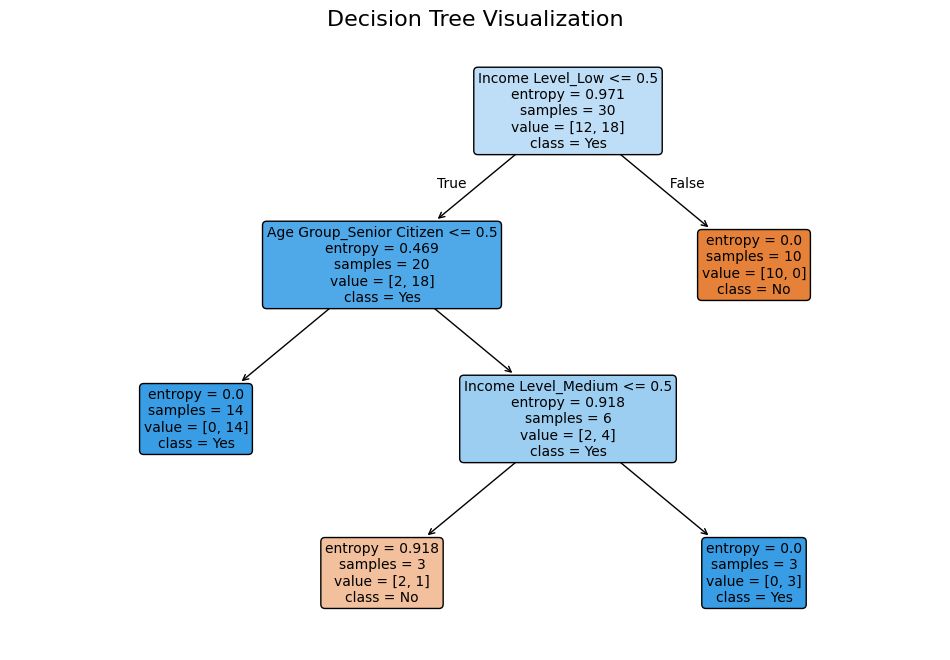

|--- Income Level_Low <= 0.50
|   |--- Age Group_Senior Citizen <= 0.50
|   |   |--- class: 1
|   |--- Age Group_Senior Citizen >  0.50
|   |   |--- Income Level_Medium <= 0.50
|   |   |   |--- class: 0
|   |   |--- Income Level_Medium >  0.50
|   |   |   |--- class: 1
|--- Income Level_Low >  0.50
|   |--- class: 0



In [23]:
df_encoded = pandas.get_dummies(df, columns=["Age Group", "Income Level", "Marital Status"], drop_first=True)

X = df_encoded.drop("Purchased", axis=1)
y = df["Purchased"].apply(lambda x: 1 if x == "Yes" else 0)

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
clf.fit(X, y)

plt.figure(figsize=(12, 8))
tree.plot_tree(
    clf,
    feature_names=X.columns,
    class_names=["No", "Yes"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()

tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)

In [24]:
import tkinter

In [ ]:
window = tkinter.Tk()
window.minsize(width = 300, height = 300)
window.title("Decision Tree (Without Model)")
window.config(bg = "#F0F8FF")

head = tkinter.Label()
head.config(text = "Decision Tree \n (Without Model)", font = ("Helvetica", 15, "bold"), padx = 10, pady = 10)
head.config(highlightthickness = 2, highlightbackground = "black", bg = "#F0F8FF")
head.grid(row = 1, column = 1, columnspan = 2, padx = 10, pady = 10)

age = tkinter.Label()
age.config(text = "Age: ", font = ("Helvetica", 11, "normal"), padx = 10, pady = 5)
age.config(bg = "#F0F8FF")
age.grid(row = 2, column = 1, padx = 5, pady = 5)

age_text = tkinter.Text()
age_text.config(width = 15, height = 1)
age_text.grid(row = 2, column = 2, padx = 5, pady = 5)

income = tkinter.Label()
income.config(text = "Income: ", font = ("Helvetica", 11, "normal"), padx = 10, pady = 5)
income.config(bg = "#F0F8FF")
income.grid(row = 3, column = 1, padx = 5, pady = 5)

income_text = tkinter.Text()
income_text.config(width = 15, height = 1)
income_text.grid(row = 3, column = 2, padx = 5, pady = 5)

mar = tkinter.Label()
mar.config(text = "Marital Status: ", font = ("Helvetica", 11, "normal"), padx = 10, pady = 5)
mar.config(bg = "#F0F8FF")
mar.grid(row = 4, column = 1, padx = 5, pady = 5)

mar_text = tkinter.Text()
mar_text.config(width = 15, height = 1)
mar_text.grid(row = 4, column = 2, padx = 5, pady = 5)

def entropy(n, total):
    try: 
        result = (((-n) / total) * math.log2(n / total) - ((total - n) / total) * math.log2((total - n) / total))
    except (ValueError, ZeroDivisionError):
        result = 0
    return result

def ig(total_entropy, a, aa, b, bb, c, cc):
    result = total_entropy - (((a / 30) * aa) + ((b / 30) * bb) + ((c / 30) * cc))
    return result

def pred(best_attribute, pre):
    best = tkinter.Label()
    best.config(text = f"Best Splitting Attribute: {best_attribute}", font = ("Helvetica", 11, "normal"), padx = 10, pady = 5, bg = "#F0F8FF")
    best.grid(row = 6, column = 1, columnspan = 2, padx = 5, pady = 5)

    prediction_ = tkinter.Label()
    prediction_.config(text = f"Prediction: {pre}", font = ("Helvetica", 12, "normal"), padx = 10, pady = 5, bg = "#F0F8FF")
    prediction_.config(highlightthickness = 1, highlightbackground = "black", bg = "#F0F8FF")
    prediction_.grid(row = 7, column = 1, columnspan = 2, padx = 5, pady = 10)

def dt():
    age = (age_text.get("1.0", "end").strip()).lower()
    income = (income_text.get("1.0", "end").strip()).lower()
    mar = (mar_text.get("1.0", "end").strip()).lower()
    
    total = len(df)
    yes = (df["Purchased"] == "Yes").sum()
    total_entropy = entropy(yes, total)
    
    age_young = ((df["Age Group"] == "Young") & (df["Purchased"] == "Yes")).sum()
    age_young_total = (df["Age Group"] == "Young").sum()
    young_entropy = entropy(age_young, age_young_total)
    
    age_middle = ((df["Age Group"] == "Middle-aged") & (df["Purchased"] == "Yes")).sum()
    age_middle_total = (df["Age Group"] == "Middle-aged").sum()
    middle_entropy = entropy(age_middle, age_middle_total)

    age_senior = ((df["Age Group"] == "Senior Citizen") & (df["Purchased"] == "Yes")).sum()
    age_senior_total = (df["Age Group"] == "Senior Citizen").sum()
    senior_entropy = entropy(age_senior, age_senior_total)

    ig_age = ig(total_entropy, age_young_total, young_entropy, age_middle_total, middle_entropy, age_senior_total, senior_entropy)

    income_low = ((df["Income Level"] == "Low") & (df["Purchased"] == "Yes")).sum()
    income_low_total = (df["Income Level"] == "Low").sum()
    low_entropy = entropy(income_low, income_low_total)

    income_medium = ((df["Income Level"] == "Medium") & (df["Purchased"] == "Yes")).sum()
    income_medium_total = (df["Income Level"] == "Medium").sum()
    medium_entropy = entropy(income_medium, income_medium_total)

    income_high = ((df["Income Level"] == "High") & (df["Purchased"] == "Yes")).sum()
    income_high_total = (df["Income Level"] == "High").sum()
    high_entropy = entropy(income_high, income_high_total)

    ig_income = ig(total_entropy, income_low_total, low_entropy, income_medium_total, medium_entropy, income_high_total, high_entropy)

    mar_single = ((df["Marital Status"] == "Single") & (df["Purchased"] == "Yes")).sum()
    mar_single_total = (df["Marital Status"] == "Single").sum()
    single_entropy = entropy(mar_single, mar_single_total)

    mar_married = ((df["Marital Status"] == "Married") & (df["Purchased"] == "Yes")).sum()
    mar_married_total = (df["Marital Status"] == "Married").sum()
    married_entropy = entropy(mar_married, mar_married_total)

    ig_mar = ig(total_entropy, mar_single_total, single_entropy, mar_married_total, married_entropy, 0, 0)
    
    entropies = [ig_age, ig_income, ig_mar]
    attributes = ["age", "income", "marital status"]
    max_index = entropies.index(max(entropies))
    best_attribute = attributes[max_index]

    #print(f"The best attribute for splitting is: {best_attribute}")

    if age == "young":
        if income == "high":
            pre =  "Yes"
        else:
            pre ="No"
    elif age == "middle":
        if mar == "married":
            pre ="Yes"
        else:
            pre = "No"
    elif age == "senior":
        if income == "medium":
            pre = "Yes"
        else:
            pre ="No"
    else:
        pre = "Unable to predict"

    pred(best_attribute.title(), pre)

predict = tkinter.Button(command = dt)
predict.config(text = "Predict", font = ("Helvetica", 12, "bold"), padx = 10, pady = 5)
predict.grid(row = 5, column = 1, columnspan = 2, padx = 5, pady = 5)


window.mainloop()